<a href="https://colab.research.google.com/github/dkdkdskf/kkk/blob/main/AI_Lab3_ipynb%EC%9D%98_%EC%82%AC%EB%B3%B8%EC%9D%98_%EC%82%AC%EB%B3%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Laboratory 3 - Introduction to Artificial Intelligence Class

This is an exercise for you to continue learning about the basics of data preprocessing.

Each question has a value of 5 point

For this laboratory each exercise you have to develop your own answer.

You can add more cells as is required.

## * It is important that you indicate the procedure you are performing (writting a comment). In case there is no comments, the score will be reduced by 50% of the final grade.

## Write your basic information
 * Full Name:  Seo Ye Eun
 * Student ID: 202002944
 * GitHub ID: dkdkdskf
 * Date:2022-04-10


## Question 1: Analyze, preprocess the following dataset and at the end split the dataset in train 60%, validation 20%, test 20% 

In [16]:
# load the sample data
from sklearn.datasets import fetch_california_housing
dataset = fetch_california_housing()

import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn import model_selection
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from scipy.stats import norm
from scipy import stats
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")


In [3]:
# Data description
print(dataset.DESCR)


.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

In [6]:
df = pd.DataFrame(dataset.data, columns=dataset.feature_names)
df['target'] = dataset.target

df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [7]:
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [11]:
df.isnull().sum()

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
target        0
dtype: int64

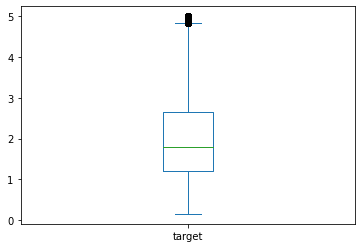

In [12]:
df['target'].plot(kind='box')

In [13]:
df['SQRT_T'] = df['target']**0.5
df['sqrt_t']=np.sqrt(df['target'])
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target,SQRT_T,sqrt_t
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526,2.127440,2.127440
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585,1.893410,1.893410
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521,1.876433,1.876433
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413,1.847431,1.847431
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422,1.849865,1.849865


In [14]:
df['Log T']=np.log(df['target'])
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target,SQRT_T,sqrt_t,Log T
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526,2.127440,2.127440,1.509839
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585,1.893410,1.893410,1.276758
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521,1.876433,1.876433,1.258745
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413,1.847431,1.847431,1.227592
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422,1.849865,1.849865,1.230225


In [19]:
df['BOXCOX_T']=pd.Series(stats.boxcox(df['target']))[0]
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target,SQRT_T,sqrt_t,Log T,BOXCOX_T
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526,2.127440,2.127440,1.509839,1.661390
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585,1.893410,1.893410,1.276758,1.384055
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521,1.876433,1.876433,1.258745,1.362955
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413,1.847431,1.847431,1.227592,1.326576
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422,1.849865,1.849865,1.230225,1.329645


In [27]:
#check the skewness and kurosis
print("The skewness of the original data is {}".format(df.target.skew()))
print('The skewness of the SQRT Transformated data is {}'. format(df.SQRT_T.skew()))
print('The skewness of the LOG Transformated data is {}'. format(df['Log T'].skew()))
print('The skewness of the BoxCox Transformated data is {}'. format(df['BOXCOX_T'].skew()))


The skewness of the original data is 0.9777632739098345
The skewness of the SQRT Transformated data is 0.43938209295249075
The skewness of the LOG Transformated data is -0.17317539032496646
The skewness of the BoxCox Transformated data is -0.012149405986966707


In [25]:
print("The kurosis of the original data is {}".format(df.target.kurt()))
print('The kurosis of the SQRT Transformated data is {}'. format(df.SQRT_T.kurt()))
print('The kurosis of the LOG Transformated data is {}'. format(df['Log T'].kurt()))
print('The kurosis of the BoxCox Transformated data is {}'. format(df['BOXCOX_T'].kurt()))

The kurosis of the original data is 0.3278702429465876
The kurosis of the SQRT Transformated data is -0.41664362497333896
The kurosis of the LOG Transformated data is -0.426240791503417
The kurosis of the BoxCox Transformated data is -0.5222770146719635


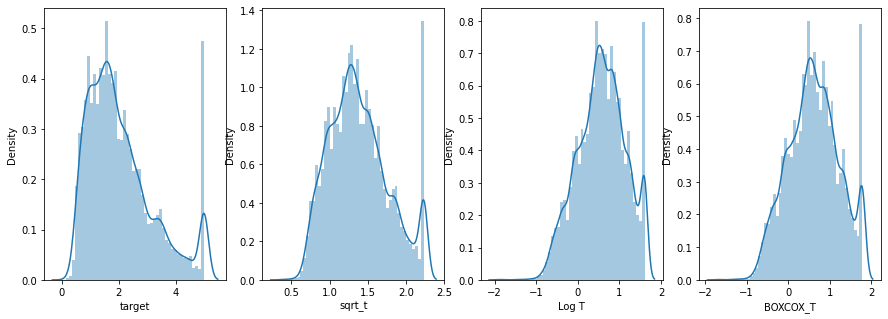

In [26]:
from matplotlib import pyplot as plt
fig,axes = plt.subplots(1,4,figsize=(15,5))

sns.distplot(df['target'],ax=axes[0])
sns.distplot(df['sqrt_t'],ax=axes[1])
sns.distplot(df['Log T'], ax=axes[2])
sns.distplot(df['BOXCOX_T'],ax=axes[3])

In [50]:
#for rate variable

min_t=df.target.min()
min_t


0.14999

In [51]:
max_t=df.target.max()
max_t

5.00001

In [53]:
df['Min_Max_T']=(df['target']-min_t)/(max_t-min_t)

In [54]:
print('The skewness for the original data is {}'.format(df.target.skew()))
print('The skewness for the Min Max is {}'.format(df.Min_Max_T.skew()))
print('')
print('The kurtosis for the original data is {}'.format(df.target.kurt()))
print('The kurtosis for the Min Max is {}'.format(df.Min_Max_T.kurt()))

The skewness for the original data is 0.9777632739098345
The skewness for the Min Max is 0.9777632739098342

The kurtosis for the original data is 0.3278702429465876
The kurtosis for the Min Max is 0.32787024294658806


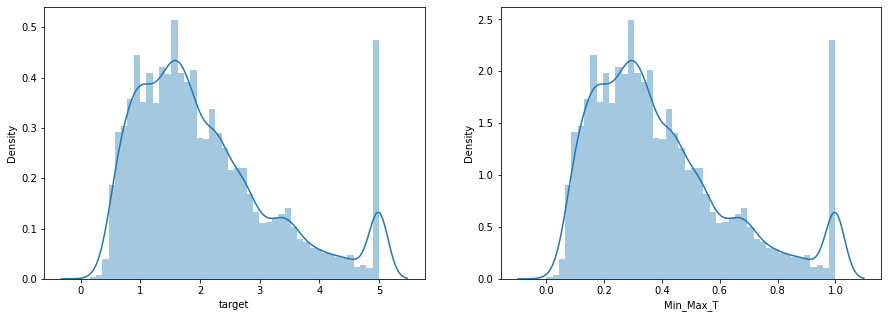

In [55]:
#distribution
#target

fig,axes=plt.subplots(1,2,figsize=(15,5))
sns.distplot(df['target'],ax=axes[0])
sns.distplot(df['Min_Max_T'],ax=axes[1])


In [97]:
import scipy.stats as stats
df['Z']=stats.zscore(df['target'])
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target,SQRT_T,Min_Max_T,Z
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526,2.127440,0.902266,2.129631
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585,1.893410,0.708247,1.314156
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521,1.876433,0.695051,1.258693
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413,1.847431,0.672783,1.165100
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422,1.849865,0.674638,1.172900


In [98]:
df[(df['Z']<-3) | (df['Z']>3)]

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target,SQRT_T,Min_Max_T,Z


In [99]:
#cleanes data: without outliers

df2=df[(df['Z']>-3)| (df['Z']>3)].reset_index()
df2.head()

,index,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target,SQRT_T,Min_Max_T,Z
0,0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526,2.127440,0.902266,2.129631
1,1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585,1.893410,0.708247,1.314156
2,2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521,1.876433,0.695051,1.258693
3,3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413,1.847431,0.672783,1.165100
4,4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422,1.849865,0.674638,1.172900


In [100]:
df3=df2.copy()

In [102]:
df3.drop(columns=['SQRT_T','Min_Max_T'],inplace=True)
df3.head

<bound method NDFrame.head of        index  MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  \
0          0  8.3252      41.0  6.984127   1.023810       322.0  2.555556   
1          1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842   
2          2  7.2574      52.0  8.288136   1.073446       496.0  2.802260   
3          3  5.6431      52.0  5.817352   1.073059       558.0  2.547945   
4          4  3.8462      52.0  6.281853   1.081081       565.0  2.181467   
...      ...     ...       ...       ...        ...         ...       ...   
20635  20635  1.5603      25.0  5.045455   1.133333       845.0  2.560606   
20636  20636  2.5568      18.0  6.114035   1.315789       356.0  3.122807   
20637  20637  1.7000      17.0  5.205543   1.120092      1007.0  2.325635   
20638  20638  1.8672      18.0  5.329513   1.171920       741.0  2.123209   
20639  20639  2.3886      16.0  5.254717   1.162264      1387.0  2.616981   

       Latitude  Longitude  target         Z 

In [103]:
#Find the quantiles

Q1= df3.target.quantile(0.25)
Q2=df3.target.quantile(0.50)
Q3=df3.target.quantile(0.75)

#IQR

IQR=Q3-Q1

#Lower Limit
LC= Q1-(1.5*IQR)

#Upper Limit
UC = Q3+(1.5*IQR)

print(LC)
print(UC)

-0.9808749999999995
4.824124999999999


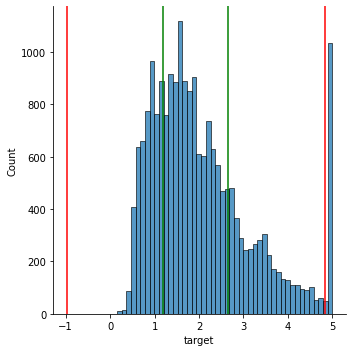

In [104]:
#Plot

sns.displot(df3.target)
plt.axvline(UC, color='r')
plt.axvline(LC, color='r')
plt.axvline(Q1, color='g')
plt.axvline(Q3, color='g')

In [105]:
#count the outliers

df3[(df3.target<LC) | (df3.target>UC)].reset_index(drop=True)

,index,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target,Z
0,89,1.2434,52.0,2.929412,0.917647,396.0,4.658824,37.80,-122.27,5.00001,2.540411
1,140,6.3624,30.0,5.615385,0.730769,126.0,2.423077,37.81,-122.18,4.83300,2.395679
2,459,1.1696,52.0,2.436000,0.944000,1349.0,5.396000,37.87,-122.25,5.00001,2.540411
3,489,3.0417,48.0,4.690632,1.126362,1656.0,3.607843,37.86,-122.25,4.89600,2.450275
4,493,7.8521,52.0,7.794393,1.051402,517.0,2.415888,37.86,-122.24,5.00001,2.540411
...,...,...,...,...,...,...,...,...,...,...,...
1066,20422,5.1457,35.0,6.958333,1.217593,576.0,2.666667,34.14,-118.90,5.00001,2.540411
1067,20426,10.0472,11.0,9.890756,1.159664,415.0,3.487395,34.18,-118.69,5.00001,2.540411
1068,20427,8.6499,4.0,7.236059,1.032528,5495.0,2.553439,34.19,-118.80,5.00001,2.540411
1069,20436,12.5420,10.0,9.873315,1.102426,1179.0,3.177898,34.21,-118.69,5.00001,2.540411


In [106]:
#count
df3[(df3.target<LC)| (df3.target>UC)].shape[0]

1071

In [108]:
#clean data

df4=df[(df3.target>LC) & (df3.target<UC)]
df4.head

<bound method NDFrame.head of        MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0      8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1      8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2      7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3      5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4      3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   
...       ...       ...       ...        ...         ...       ...       ...   
20635  1.5603      25.0  5.045455   1.133333       845.0  2.560606     39.48   
20636  2.5568      18.0  6.114035   1.315789       356.0  3.122807     39.49   
20637  1.7000      17.0  5.205543   1.120092      1007.0  2.325635     39.43   
20638  1.8672      18.0  5.329513   1.171920       741.0  2.123209     39.43   
20639  2.3886      16.0  5.254717   1.162264      1387.0  2.616981     39.37   

       Lo

In [111]:
#library
from sklearn.preprocessing import StandardScaler

df_num=df4[['target']]
df_num.head

<bound method NDFrame.head of        target
0       4.526
1       3.585
2       3.521
3       3.413
4       3.422
...       ...
20635   0.781
20636   0.771
20637   0.923
20638   0.847
20639   0.894

[19569 rows x 1 columns]>

In [112]:
SS=StandardScaler()
scaled_x=SS.fit_transform(df_num)

In [113]:
print(scaled_x)

[[ 2.74264823]
 [ 1.75664835]
 [ 1.68958779]
 ...
 [-1.03265205]
 [-1.11228647]
 [-1.06303887]]


In [114]:
!pip install category_encoders

In [118]:

col=df4['target'] 
from category_encoders import OneHotEncoder

onehot_enc= OneHotEncoder(use_cat_names=True,handle_missing='indicator',
                          handle_unknown='indicator')

In [129]:
onehot_enc.fit_transform(df4[['target']])

,target
0,4.526
1,3.585
2,3.521
3,3.413
4,3.422
...,...
20635,0.781
20636,0.771
20637,0.923
20638,0.847


In [130]:
onehot_enc.mapping[0]['mapping']

IndexError: ignored

In [124]:
ex_enc=OneHotEncoder(use_cat_names=True)
ex_map=ex_enc.fit_transform(df)
ex_enc.mapping[0]['mapping']

IndexError: ignored

In [127]:
from sklearn.preprocessing import OneHotEncoder as OneHotEncoder_sk
dummy_enc= OneHotEncoder_sk(drop='first', sparse=False)
dummy_enc.fit_transform(df4[['target']])

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [131]:
dummy_enc.get_feature_names_out()

array(['target_0.175', 'target_0.225', 'target_0.25', ..., 'target_4.813',
       'target_4.815', 'target_4.822'], dtype=object)

In [132]:
dummy_enc.categories_

[array([0.14999, 0.175  , 0.225  , ..., 4.813  , 4.815  , 4.822  ])]

In [136]:
dummy_df2=pd.get_dummies(df4['target'], prefix='rp',drop_first='True')
dummy_df2.head()

,rp_0.175,rp_0.225,rp_0.25,rp_0.266,rp_0.269,rp_0.275,rp_0.283,rp_0.3,rp_0.325,rp_0.329,...,rp_4.786,rp_4.79,rp_4.795,rp_4.797,rp_4.801,rp_4.806,rp_4.808,rp_4.813,rp_4.815,rp_4.822
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [137]:
dummy_df2.drop_duplicates()

,rp_0.175,rp_0.225,rp_0.25,rp_0.266,rp_0.269,rp_0.275,rp_0.283,rp_0.3,rp_0.325,rp_0.329,...,rp_4.786,rp_4.79,rp_4.795,rp_4.797,rp_4.801,rp_4.806,rp_4.808,rp_4.813,rp_4.815,rp_4.822
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20417,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
20419,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
20428,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
20566,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [138]:
x_data = dataset.data
y_data = dataset.target

x_train_val=dataset.data
y_train_val=dataset.target

In [139]:
x_train, x_test, y_train, y_test = model_selection.train_test_split(x_data, y_data, test_size=0.2,shuffle=False)
x_val, x_test, y_val, y_test = model_selection.train_test_split(x_train_val, y_train_val, test_size=0.2)

estimator = LinearRegression()

estimator.fit(x_train, y_train)



LinearRegression()

In [140]:
y_predict = estimator.predict(x_train) 
score = metrics.r2_score(y_train, y_predict)
print(score) #1.0


0.5844329298051015


In [141]:
y_predict = estimator.predict(x_test) 
score = metrics.r2_score(y_test, y_predict)
print(score) #1.0

0.6074455779774555


## Question 2: Download, analyze, preprocess the following dataset and finally split the dataset in train 70%, validation 10%, test 10% 

In [ ]:
# Download the file okc_train.csv from the LMS (cyber.inu.ac.kr)
# OkCupid is an online site that serves international users
# Dataset have 38,809 profiles from the San Francisco area
# The goal is to predict whether a person's profession is in the STEM field

In [144]:
import os
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from scipy.stats import norm
from scipy import stats
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [145]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [146]:
df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/okc_train (1) (1).csv')
df.head

<bound method NDFrame.head of        Unnamed: 0  age               diet      drinks          drugs  \
0               1   22  strictly_anything    socially          never   
1               4   23         vegetarian    socially  drugs_missing   
2               6   29    mostly_anything    socially  drugs_missing   
3               8   31    mostly_anything    socially          never   
4              10   37    mostly_anything  not_at_all          never   
...           ...  ...                ...         ...            ...   
38804       59940   52       diet_missing    socially          never   
38805       59943   24    mostly_anything       often      sometimes   
38806       59944   42    mostly_anything  not_at_all          never   
38807       59945   27    mostly_anything    socially          often   
38808       59946   39       diet_missing    socially  drugs_missing   

                               education  height     income  last_online  \
0          working_on_college

In [147]:
df.describe()


,Unnamed: 0,age,height,last_online,cpp,cpp_fluently,cpp_okay,cpp_poorly,lisp,lisp_fluently,...,black,hispanic_latin,indian,middle_eastern,native_american,other,pacific_islander,white,essay_length,profile
count,38809.000000,38809.000000,38809.000000,38809.000000,38809.000000,38809.000000,38809.000000,38809.000000,38809.000000,38809.000000,...,38809.000000,38809.000000,38809.000000,38809.000000,38809.000000,38809.000000,38809.000000,38809.000000,38809.000000,38809.000000
mean,29963.827076,32.558247,68.346853,38.847716,0.002963,0.012497,0.009663,0.007653,0.000618,0.001598,...,0.056533,0.089721,0.024298,0.015306,0.021206,0.060733,0.025355,0.646706,3.132119,25870.738514
std,17281.276793,9.513597,3.975089,75.887516,0.054356,0.111091,0.097824,0.087146,0.024861,0.039938,...,0.230952,0.285786,0.153976,0.122767,0.144074,0.238844,0.157203,0.477999,0.681367,14921.673453
min,1.000000,18.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,15079.000000,26.000000,66.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.009876,12982.000000
50%,29982.000000,30.000000,68.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,3.269980,25920.000000
75%,44880.000000,37.000000,71.000000,29.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,3.481443,38760.000000
max,59946.000000,109.000000,95.000000,370.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.771690,51747.000000


In [148]:
df.describe(exclude=[np.number])

,diet,drinks,drugs,education,income,offspring,pets,religion,sign,smokes,status,where_state,where_town,religion_modifer,sign_modifer,Class
count,38809,38809,38809,38809,38809,38809,38809,38809,38809,38809,38809,38809,38809,38809,38809,38809
unique,19,7,4,33,13,16,16,10,13,6,5,28,51,5,4,2
top,diet_missing,socially,never,graduated_from_college_university,missing,kids_missing,pets_missing,religion_missing,sign_missing,no,single,california,san_francisco,religion_mod_missing,sign_mod_missing,other
freq,14698,27521,24600,16065,30419,21963,11402,11447,5863,29194,36014,38757,20028,19260,13427,31642


In [149]:
df.isnull().sum()

Unnamed: 0          0
age                 0
diet                0
drinks              0
drugs               0
education           0
height              0
income              0
last_online         0
offspring           0
pets                0
religion            0
sign                0
smokes              0
status              0
where_state         0
where_town          0
religion_modifer    0
sign_modifer        0
cpp                 0
cpp_fluently        0
cpp_okay            0
cpp_poorly          0
lisp                0
lisp_fluently       0
lisp_okay           0
lisp_poorly         0
asian               0
black               0
hispanic_latin      0
indian              0
middle_eastern      0
native_american     0
other               0
pacific_islander    0
white               0
essay_length        0
Class               0
profile             0
dtype: int64

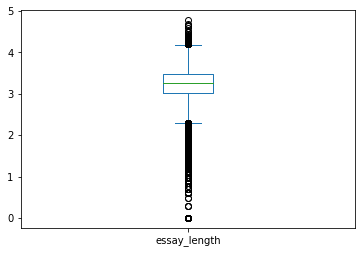

In [150]:
df['essay_length'].plot(kind='box')

In [151]:
df['sqrt_e']=df['essay_length']**0.5

In [152]:
df['s_e']=np.sqrt(df['essay_length'])

In [153]:
df.head()

,Unnamed: 0,age,diet,drinks,drugs,education,height,income,last_online,offspring,...,middle_eastern,native_american,other,pacific_islander,white,essay_length,Class,profile,sqrt_e,s_e
0,1,22,strictly_anything,socially,never,working_on_college_university,75,missing,3,doesnt_have_kids_but_might_want_them,...,0,0,0,0,1,3.420945,other,1,1.849580,1.849580
1,4,23,vegetarian,socially,drugs_missing,working_on_college_university,71,inc20000,3,doesnt_want_kids,...,0,0,0,0,1,2.671173,other,3,1.634372,1.634372
2,6,29,mostly_anything,socially,drugs_missing,graduated_from_college_university,67,missing,2,doesnt_have_kids_but_might_want_them,...,0,0,0,0,1,3.391112,stem,5,1.841497,1.841497
3,8,31,mostly_anything,socially,never,graduated_from_college_university,65,missing,2,doesnt_have_kids_but_wants_them,...,0,0,0,0,1,3.090611,other,6,1.758013,1.758013
4,10,37,mostly_anything,not_at_all,never,working_on_two_year_college,65,missing,3,kids_missing,...,0,0,0,0,1,3.382377,other,7,1.839124,1.839124


In [154]:
print("The skewness of the original data is {}". format(df.essay_length.skew()))
print('The skewness of the SQRT Transformated data is {}'.format(df.sqrt_e.skew()))
print('')
print("The kurtosis of the original data is {}". format(df.essay_length.kurt()))
print('The kurtosis of the SQRT transformated data is {}'.format(df.s_e.kurt()))


The skewness of the original data is -3.0626652046794267
The skewness of the SQRT Transformated data is -4.488305622753776

The kurtosis of the original data is 11.304245297063936
The kurtosis of the SQRT transformated data is 20.72341485031673


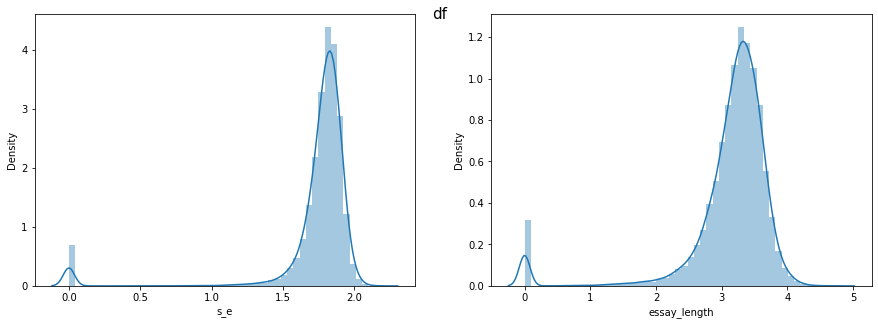

In [155]:
fig,axes=plt.subplots(1,2,figsize=(15,5))
plt.suptitle('df',fontsize=15, y=0.9)

sns.distplot(df['essay_length'],ax=axes[1])
sns.distplot(df['s_e'],ax=axes[0])

In [156]:

df['Z1']=stats.zscore(df['essay_length'])
df.head()

,Unnamed: 0,age,diet,drinks,drugs,education,height,income,last_online,offspring,...,native_american,other,pacific_islander,white,essay_length,Class,profile,sqrt_e,s_e,Z1
0,1,22,strictly_anything,socially,never,working_on_college_university,75,missing,3,doesnt_have_kids_but_might_want_them,...,0,0,0,1,3.420945,other,1,1.849580,1.849580,0.423899
1,4,23,vegetarian,socially,drugs_missing,working_on_college_university,71,inc20000,3,doesnt_want_kids,...,0,0,0,1,2.671173,other,3,1.634372,1.634372,-0.676510
2,6,29,mostly_anything,socially,drugs_missing,graduated_from_college_university,67,missing,2,doesnt_have_kids_but_might_want_them,...,0,0,0,1,3.391112,stem,5,1.841497,1.841497,0.380113
3,8,31,mostly_anything,socially,never,graduated_from_college_university,65,missing,2,doesnt_have_kids_but_wants_them,...,0,0,0,1,3.090611,other,6,1.758013,1.758013,-0.060919
4,10,37,mostly_anything,not_at_all,never,working_on_two_year_college,65,missing,3,kids_missing,...,0,0,0,1,3.382377,other,7,1.839124,1.839124,0.367294


In [157]:
df[(df['Z1']<-3) | (df['Z1']>3)]

,Unnamed: 0,age,diet,drinks,drugs,education,height,income,last_online,offspring,...,native_american,other,pacific_islander,white,essay_length,Class,profile,sqrt_e,s_e,Z1
6,14,30,mostly_anything,socially,never,graduated_from_high_school,66,inc30000,18,kids_missing,...,0,0,0,1,0.0,other,10,0.0,0.0,-4.596877
47,65,28,anything,socially,never,graduated_from_college_university,72,missing,4,doesnt_have_kids,...,0,0,0,0,0.0,other,56,0.0,0.0,-4.596877
56,81,28,diet_missing,often,never,graduated_from_masters_program,67,missing,7,doesnt_have_kids,...,0,0,0,1,0.0,other,71,0.0,0.0,-4.596877
59,85,30,diet_missing,socially,never,graduated_from_college_university,73,missing,189,kids_missing,...,0,0,0,0,0.0,stem,74,0.0,0.0,-4.596877
144,223,32,diet_missing,socially,never,two_year_college,69,missing,2,kids_missing,...,0,0,0,1,0.0,other,189,0.0,0.0,-4.596877
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38676,59747,55,mostly_vegetarian,socially,never,graduated_from_masters_program,70,missing,318,kids_missing,...,0,0,0,1,0.0,other,51576,0.0,0.0,-4.596877
38679,59750,24,anything,socially,never,graduated_from_masters_program,69,missing,70,kids_missing,...,0,0,0,0,0.0,stem,51579,0.0,0.0,-4.596877
38750,59858,27,mostly_anything,socially,never,graduated_from_college_university,71,missing,13,kids_missing,...,0,0,0,1,0.0,other,51672,0.0,0.0,-4.596877
38767,59882,33,mostly_anything,socially,never,graduated_from_college_university,66,missing,46,kids_missing,...,0,0,0,1,0.0,other,51693,0.0,0.0,-4.596877


In [159]:
#count of outliers
df[(df['Z1']<-3) | (df['Z1']>3)].shape[0]

1230

In [161]:
df2=df[(df['Z1']>-3)| (df['Z1']>3)].reset_index()
df2.head()

,index,Unnamed: 0,age,diet,drinks,drugs,education,height,income,last_online,...,native_american,other,pacific_islander,white,essay_length,Class,profile,sqrt_e,s_e,Z1
0,0,1,22,strictly_anything,socially,never,working_on_college_university,75,missing,3,...,0,0,0,1,3.420945,other,1,1.849580,1.849580,0.423899
1,1,4,23,vegetarian,socially,drugs_missing,working_on_college_university,71,inc20000,3,...,0,0,0,1,2.671173,other,3,1.634372,1.634372,-0.676510
2,2,6,29,mostly_anything,socially,drugs_missing,graduated_from_college_university,67,missing,2,...,0,0,0,1,3.391112,stem,5,1.841497,1.841497,0.380113
3,3,8,31,mostly_anything,socially,never,graduated_from_college_university,65,missing,2,...,0,0,0,1,3.090611,other,6,1.758013,1.758013,-0.060919
4,4,10,37,mostly_anything,not_at_all,never,working_on_two_year_college,65,missing,3,...,0,0,0,1,3.382377,other,7,1.839124,1.839124,0.367294


In [162]:
df3=df2.copy()
df3.drop(columns=['Z1','sqrt_e','s_e'],inplace=True)
df3.head

<bound method NDFrame.head of        index  Unnamed: 0  age               diet      drinks          drugs  \
0          0           1   22  strictly_anything    socially          never   
1          1           4   23         vegetarian    socially  drugs_missing   
2          2           6   29    mostly_anything    socially  drugs_missing   
3          3           8   31    mostly_anything    socially          never   
4          4          10   37    mostly_anything  not_at_all          never   
...      ...         ...  ...                ...         ...            ...   
37574  38804       59940   52       diet_missing    socially          never   
37575  38805       59943   24    mostly_anything       often      sometimes   
37576  38806       59944   42    mostly_anything  not_at_all          never   
37577  38807       59945   27    mostly_anything    socially          often   
37578  38808       59946   39       diet_missing    socially  drugs_missing   

                     

In [164]:
#Find the quantiles

Q1= df3.essay_length.quantile(0.25)
Q2=df3.essay_length.quantile(0.50)
Q3=df3.essay_length.quantile(0.75)

#IQR

IQR=Q3-Q1

#Lower Limit
LC= Q1-(1.5*IQR)

#Upper Limit
UC = Q3+(1.5*IQR)

print(LC)
print(UC)

2.369387830304855
4.1614007765804955


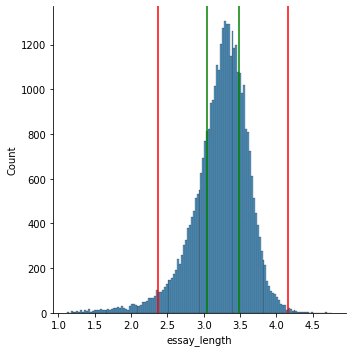

In [165]:
#Plot

sns.displot(df3.essay_length)
plt.axvline(UC, color='r')
plt.axvline(LC, color='r')
plt.axvline(Q1, color='g')
plt.axvline(Q3, color='g')

In [167]:
#count the outliers

df3[(df3.essay_length<LC) | (df3.essay_length>UC)].reset_index(drop=True)

,index,Unnamed: 0,age,diet,drinks,drugs,education,height,income,last_online,...,hispanic_latin,indian,middle_eastern,native_american,other,pacific_islander,white,essay_length,Class,profile
0,62,91,24,anything,socially,never,graduated_from_college_university,74,missing,156,...,0,0,0,0,0,0,0,2.173186,other,77
1,63,93,29,diet_missing,drinks_missing,sometimes,graduated_from_two_year_college,67,inc50000,340,...,0,0,0,0,0,0,1,1.612784,other,79
2,88,140,23,diet_missing,rarely,never,working_on_college_university,73,missing,16,...,0,0,0,0,0,0,1,2.075547,other,119
3,105,166,30,diet_missing,drinks_missing,drugs_missing,ed_missing,74,missing,3,...,0,0,0,0,0,0,1,2.004321,stem,139
4,127,201,27,anything,socially,never,graduated_from_college_university,65,inc80000,2,...,0,0,0,0,0,0,0,2.212188,other,170
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1288,38673,59743,25,strictly_anything,socially,never,graduated_from_college_university,68,missing,0,...,0,0,0,0,0,0,1,2.212188,other,51572
1289,38690,59771,21,strictly_anything,socially,sometimes,graduated_from_two_year_college,60,inc20000,78,...,0,0,0,0,0,0,0,2.336460,other,51596
1290,38751,59859,22,diet_missing,socially,never,working_on_college_university,70,missing,1,...,1,0,0,0,0,0,1,2.363612,stem,51673
1291,38759,59872,20,anything,socially,never,graduated_from_high_school,60,inc20000,145,...,0,0,0,0,0,0,0,2.214844,other,51685


In [168]:
#count
df3[(df3.essay_length<LC)| (df3.essay_length>UC)].shape[0]

1293

In [172]:
#clean data

df4=df3[(df3.essay_length>LC) & (df3.essay_length<UC)]
df4.head

<bound method NDFrame.head of        index  Unnamed: 0  age               diet      drinks          drugs  \
0          0           1   22  strictly_anything    socially          never   
1          1           4   23         vegetarian    socially  drugs_missing   
2          2           6   29    mostly_anything    socially  drugs_missing   
3          3           8   31    mostly_anything    socially          never   
4          4          10   37    mostly_anything  not_at_all          never   
...      ...         ...  ...                ...         ...            ...   
37574  38804       59940   52       diet_missing    socially          never   
37575  38805       59943   24    mostly_anything       often      sometimes   
37576  38806       59944   42    mostly_anything  not_at_all          never   
37577  38807       59945   27    mostly_anything    socially          often   
37578  38808       59946   39       diet_missing    socially  drugs_missing   

                     

In [174]:
#standarization

avg_e=df3['essay_length'].mean()
avg_e

3.233561582290266

In [175]:
std_e=df['essay_length'].std()
std_e

0.681366717846007

In [176]:
#step 1: transform using z-score

df3['Z_Score_e']=(df3['essay_length']- avg_e)/std_e
df3.head()

,index,Unnamed: 0,age,diet,drinks,drugs,education,height,income,last_online,...,indian,middle_eastern,native_american,other,pacific_islander,white,essay_length,Class,profile,Z_Score_e
0,0,1,22,strictly_anything,socially,never,working_on_college_university,75,missing,3,...,0,0,0,0,0,1,3.420945,other,1,0.275012
1,1,4,23,vegetarian,socially,drugs_missing,working_on_college_university,71,inc20000,3,...,0,0,0,0,0,1,2.671173,other,3,-0.825383
2,2,6,29,mostly_anything,socially,drugs_missing,graduated_from_college_university,67,missing,2,...,0,0,0,0,0,1,3.391112,stem,5,0.231226
3,3,8,31,mostly_anything,socially,never,graduated_from_college_university,65,missing,2,...,0,0,0,0,0,1,3.090611,other,6,-0.209800
4,4,10,37,mostly_anything,not_at_all,never,working_on_two_year_college,65,missing,3,...,0,0,0,0,0,1,3.382377,other,7,0.218408


In [177]:

df4=df3.copy()
df4.drop(columns=['Z_Score_e'], inplace=True)
df4.head

<bound method NDFrame.head of        index  Unnamed: 0  age               diet      drinks          drugs  \
0          0           1   22  strictly_anything    socially          never   
1          1           4   23         vegetarian    socially  drugs_missing   
2          2           6   29    mostly_anything    socially  drugs_missing   
3          3           8   31    mostly_anything    socially          never   
4          4          10   37    mostly_anything  not_at_all          never   
...      ...         ...  ...                ...         ...            ...   
37574  38804       59940   52       diet_missing    socially          never   
37575  38805       59943   24    mostly_anything       often      sometimes   
37576  38806       59944   42    mostly_anything  not_at_all          never   
37577  38807       59945   27    mostly_anything    socially          often   
37578  38808       59946   39       diet_missing    socially  drugs_missing   

                     

In [178]:
from sklearn.preprocessing import StandardScaler

df4_num=df[['essay_length']]
df4_num.head

<bound method NDFrame.head of        essay_length
0          3.420945
1          2.671173
2          3.391112
3          3.090611
4          3.382377
...             ...
38804      3.651666
38805      3.475526
38806      3.265996
38807      3.298853
38808      3.536306

[38809 rows x 1 columns]>

In [179]:
SS=StandardScaler()
scaled_x=SS.fit_transform(df4_num)

In [180]:
print(scaled_x)

[[ 0.42389874]
 [-0.67651048]
 [ 0.38011296]
 ...
 [ 0.19648665]
 [ 0.24470903]
 [ 0.59320838]]


In [181]:
min_e=df4.essay_length.min()
min_e


1.11394335230684

In [182]:
max_e=df4.essay_length.max()
max_e

4.77169034725538

In [183]:
df4['Min_Max_e']=(df4['essay_length']-min_e)/(max_e-min_e)

In [186]:
!pip install category_encoders

In [189]:
col='essay_length'
from category_encoders import OneHotEncoder

onehot_enc= OneHotEncoder(use_cat_names=True,handle_missing='indicator',
                          handle_unknown='indicator')

In [190]:
onehot_enc.fit_transform(df[[col]])

,essay_length
0,3.420945
1,2.671173
2,3.391112
3,3.090611
4,3.382377
...,...
38804,3.651666
38805,3.475526
38806,3.265996
38807,3.298853


In [191]:
ex_enc=OneHotEncoder(use_cat_names=True)
ex_map=ex_enc.fit_transform(df)
ex_enc.mapping[0]['mapping']

,diet_strictly_anything,diet_vegetarian,diet_mostly_anything,diet_diet_missing,diet_mostly_vegetarian,diet_strictly_vegan,diet_anything,diet_mostly_other,diet_strictly_other,diet_mostly_halal,diet_strictly_vegetarian,diet_other,diet_vegan,diet_mostly_kosher,diet_mostly_vegan,diet_halal,diet_strictly_halal,diet_strictly_kosher,diet_kosher
1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
10,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0


In [193]:
from sklearn.preprocessing import OneHotEncoder as OneHotEncoder_sk
dummy_enc= OneHotEncoder_sk(drop='first', sparse=False)
dummy_enc.fit_transform(df[[col]])

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [194]:
dummy_enc.get_feature_names_out()

array(['essay_length_0.301029995663981', 'essay_length_0.477121254719662',
       'essay_length_0.602059991327962', ...,
       'essay_length_4.66787303463985', 'essay_length_4.68022669949612',
       'essay_length_4.77169034725538'], dtype=object)

In [195]:
dummy_enc.categories_

[array([0.        , 0.30103   , 0.47712125, ..., 4.66787303, 4.6802267 ,
        4.77169035])]

In [196]:
dummy_df2=pd.get_dummies(df[col], prefix='rp',drop_first='True')
dummy_df2.head()

,rp_0.301029995663981,rp_0.477121254719662,rp_0.602059991327962,rp_0.698970004336019,rp_0.778151250383644,rp_0.845098040014257,rp_0.903089986991944,rp_0.954242509439325,rp_1.0,rp_1.04139268515823,...,rp_4.45118752505671,rp_4.45229256161773,rp_4.49395967455418,rp_4.4997695357684,rp_4.51360376391546,rp_4.57933764444971,rp_4.63692898768909,rp_4.66787303463985,rp_4.68022669949612,rp_4.77169034725538
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [197]:
dummy_df2.drop_duplicates()

,rp_0.301029995663981,rp_0.477121254719662,rp_0.602059991327962,rp_0.698970004336019,rp_0.778151250383644,rp_0.845098040014257,rp_0.903089986991944,rp_0.954242509439325,rp_1.0,rp_1.04139268515823,...,rp_4.45118752505671,rp_4.45229256161773,rp_4.49395967455418,rp_4.4997695357684,rp_4.51360376391546,rp_4.57933764444971,rp_4.63692898768909,rp_4.66787303463985,rp_4.68022669949612,rp_4.77169034725538
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38636,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
38669,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
38726,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
38746,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [200]:
x_data = df
y_data = df.essay_length

x_train_val=df
y_train_val=df.essay_length

In [208]:
x_train, x_test, y_train, y_test = model_selection.train_test_split(x_data, y_data, test_size=0.2,shuffle=True,stratify=df.essay_length)
x_val, x_test, y_val, y_test = model_selection.train_test_split(x_train_val, y_train_val, test_size=0.2)

estimator = LinearRegression()

estimator.fit(x_train, y_train)

ValueError: ignored

In [ ]:
y_predict = estimator.predict(x_train) 
score = metrics.r2_score(y_train, y_predict)
print(score) #1.0

In [ ]:
y_predict = estimator.predict(x_test) 
score = metrics.r2_score(y_test, y_predict)
print(score) #1.0